In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

df = pd.read_csv("cybersecurity_training/cybersecurity_training.csv" , sep = '|') 
   

#df.isnull().values.any() checking for null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   alert_ids                 39427 non-null  object 
 1   client_code               39427 non-null  object 
 2   notified                  39427 non-null  int64  
 3   categoryname              39427 non-null  object 
 4   ip                        39427 non-null  object 
 5   ipcategory_name           39427 non-null  object 
 6   ipcategory_scope          39427 non-null  object 
 7   parent_category           39427 non-null  int64  
 8   grandparent_category      39427 non-null  object 
 9   overallseverity           39427 non-null  int64  
 10  timestamp_dist            39427 non-null  int64  
 11  start_hour                39427 non-null  int64  
 12  start_minute              39427 non-null  int64  
 13  start_second              39427 non-null  int64  
 14  weekda

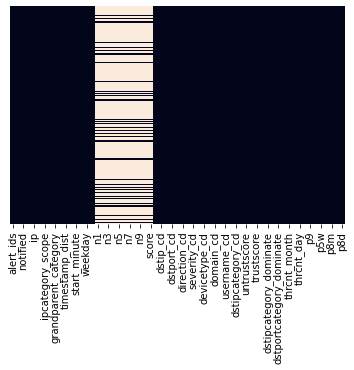

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
df.info()


In [60]:
df.shape

(39427, 63)

In [61]:

X_train = df.drop(['notified'] , axis =1)
X_train = X_train.drop(['client_code' ,'alert_ids'] , axis = 1)
print(X_train)

y_train = df['notified']
print(y_train)

               categoryname             ip ipcategory_name ipcategory_scope  \
0                    Attack    YT.LB.32.21        INTERNET         Internet   
1                   Exploit   192.SL.UK.94        PRIV-192  Private network   
2                    Attack    YT.LB.38.21        INTERNET         Internet   
3                    Attack    JX.NY.13.20        INTERNET         Internet   
4                    Attack    YT.LB.32.21        INTERNET         Internet   
...                     ...            ...             ...              ...   
39422                Attack   MC.ER.197.27        INTERNET         Internet   
39423  Control and Maintain   10.XU.AD.142         PRIV-10  Private network   
39424                Attack    YT.LB.38.21        INTERNET         Internet   
39425               Exploit  NZ.XH.108.109        INTERNET         Internet   
39426                Attack     FX.NB.56.3        INTERNET         Internet   

       parent_category grandparent_category  overal

In [62]:
X_train['n1']=df['n1'].fillna(df['n1'].mode()[0])
X_train['n2']=df['n2'].fillna(df['n2'].mode()[0])
X_train['n3']=df['n3'].fillna(df['n3'].mode()[0])
X_train['n4']=df['n4'].fillna(df['n4'].mode()[0])
X_train['n5']=df['n5'].fillna(df['n5'].mode()[0])
X_train['n6']=df['n6'].fillna(df['n6'].mode()[0])
X_train['n7']=df['n7'].fillna(df['n7'].mode()[0])
X_train['n8']=df['n8'].fillna(df['n8'].mode()[0])
X_train['n9']=df['n9'].fillna(df['n9'].mode()[0])
X_train = X_train.drop(['n10'] , axis = 1) #only contains 0 or null

In [63]:
list(X_train.columns.values)

['categoryname',
 'ip',
 'ipcategory_name',
 'ipcategory_scope',
 'parent_category',
 'grandparent_category',
 'overallseverity',
 'timestamp_dist',
 'start_hour',
 'start_minute',
 'start_second',
 'weekday',
 'correlatedcount',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'score',
 'srcip_cd',
 'dstip_cd',
 'srcport_cd',
 'dstport_cd',
 'alerttype_cd',
 'direction_cd',
 'eventname_cd',
 'severity_cd',
 'reportingdevice_cd',
 'devicetype_cd',
 'devicevendor_cd',
 'domain_cd',
 'protocol_cd',
 'username_cd',
 'srcipcategory_cd',
 'dstipcategory_cd',
 'isiptrusted',
 'untrustscore',
 'flowscore',
 'trustscore',
 'enforcementscore',
 'dstipcategory_dominate',
 'srcipcategory_dominate',
 'dstportcategory_dominate',
 'srcportcategory_dominate',
 'thrcnt_month',
 'thrcnt_week',
 'thrcnt_day',
 'p6',
 'p9',
 'p5m',
 'p5w',
 'p5d',
 'p8m',
 'p8w',
 'p8d']

In [64]:
#alert_ids - different for each row
#client_code - 276/ 39427
#notified - 2
#categoryname - 11 
#ip - 12945 / 39427
#ipcategory_name - 9
#ipcategory_scope - 4
#parent_category - 5

for i in list(X_train.columns.values):
    print ( i + "   " + str(len(X_train[i].unique())))
    if(len(X_train[i].unique()) < 100):
        print(X_train[i].unique())



categoryname   11
['Attack' 'Exploit' 'Suspicious Reputation' 'Control and Maintain'
 'Reconnaissance' 'Malicious Activity' 'Suspicious Network Activity'
 'Attack Preparation' 'Compromise' 'Suspicious Account Activity'
 'To Be Determined']
ip   12945
ipcategory_name   9
['INTERNET' 'PRIV-192' 'PRIV-10' 'PRIV-172' 'PRIV-CGN' 'LOOPBACK'
 'LINK-LOCAL' 'BROADCAST' 'MULTICAST']
ipcategory_scope   4
['Internet' 'Private network' 'Host' 'Subnet']
parent_category   5
[7 1 3 4 5]
grandparent_category   2
['A' 'B']
overallseverity   5
[3 5 4 2 1]
timestamp_dist   16215
start_hour   24
[ 8  1 14 20 16 11  0 19  6 21 22 10 15  2 18  5 13  3 12  9 17  4 23  7]
start_minute   60
[14  0 44 33 36 56 31 22 32 51  1  5 28 57  7 47 23 21 24 34  6 30 53 15
 10 52 29 39  4 17 18 42 59 25  3 16 46  8 40 49 45 26 43 20 13 50 11 37
  2 48 38 19 58 12 55  9 27 54 41 35]
start_second   60
[34  2  5 40 11 13 41 43  9 36 20 39 26  1 27 14 54 51 56 16 17 18  0 59
 47 24 30 32 44 50  7 58 33 49 22  6  8 19 57 15 38

In [65]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   categoryname              39427 non-null  object 
 1   ip                        39427 non-null  object 
 2   ipcategory_name           39427 non-null  object 
 3   ipcategory_scope          39427 non-null  object 
 4   parent_category           39427 non-null  int64  
 5   grandparent_category      39427 non-null  object 
 6   overallseverity           39427 non-null  int64  
 7   timestamp_dist            39427 non-null  int64  
 8   start_hour                39427 non-null  int64  
 9   start_minute              39427 non-null  int64  
 10  start_second              39427 non-null  int64  
 11  weekday                   39427 non-null  object 
 12  correlatedcount           39427 non-null  int64  
 13  n1                        39427 non-null  float64
 14  n2    

In [66]:
#handeling categorical features





# split IPs to prefix
X_train['ip_prefix'] = X_train['ip'].apply(lambda x: ".".join(x.split('.')[:1]))
vc = X_train['ip_prefix'].value_counts()
X_train['ip_prefix_aggreg'] = X_train['ip_prefix'].apply(lambda x: x if vc[x]>100 else "other")
X_train['ip_prefix_aggreg'].value_counts().size

categorical_string_columns = ['categoryname', 'ipcategory_name', 'ipcategory_scope', 'grandparent_category', 'weekday', 'ip_prefix_aggreg']
categorical_numeric_columns = ['parent_category','overallseverity', 'start_hour', 'start_minute', 'start_second', 'score', 'alerttype_cd', 'direction_cd', 'eventname_cd', 'isiptrusted', 'dstipcategory_dominate', 'srcipcategory_dominate', 'dstportcategory_dominate', 'srcportcategory_dominate', 'p6', 'p5m', 'p5w', 'p5d', 'p8m', 'p8w', 'p8d']
binary_columns = [ 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']



string_columns =  [ 'categoryname', 'ip', 'ipcategory_name', 'ipcategory_scope','parent_category','grandparent_category', 'weekday', 'dstipcategory_dominate', 'srcipcategory_dominate', 'ip_prefix', 'ip_prefix_aggreg']
no_strings_X_train = X_train.drop(string_columns, axis=1)


def encode(original, concate, list_of_columns):
    for column in list_of_columns:
        dummies = pd.get_dummies(columns=[column], data=original[column], prefix=column)
        concate = pd.concat([concate, dummies], axis=1)
    return concate

columns_to_encode = ['categoryname', 'weekday','ipcategory_name', 'ipcategory_scope','grandparent_category', 'dstipcategory_dominate', 'srcipcategory_dominate', 'ip_prefix_aggreg']
encoded_category = encode(X_train, no_strings_X_train, columns_to_encode)
for column in columns_to_encode:
    if column in encoded_category.columns:
        encoded = encoded.drop(column, axis=1)
print("After categorical encoding: ", len(encoded_category.columns))

# numerical columns
columns_to_encode = categorical_numeric_columns
encoded = encode(X_train, encoded_category, columns_to_encode)
for column in columns_to_encode:
    if column in encoded.columns:
        encoded = encoded.drop(column, axis=1)
print("After numerical encoding: " ,len(encoded.columns))



print(encoded)
print(encoded_category.info())

print(X_train.shape)






After categorical encoding:  138
After numerical encoding:  369
       timestamp_dist  correlatedcount   n1   n2   n3   n4   n5   n6   n7  \
0               65684               69  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             1188030             5302  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2               43716              346  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                   0                1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                2401                1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...               ...              ...  ...  ...  ...  ...  ...  ...  ...   
39422            3146                5  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39423           69048                2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39424           32872                2  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
39425               0                1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39426               0                1  0.0  0.0  1.0  1.0  1.0  0.0  0.0   

        n8 

In [67]:

X_train = X_train.drop(['grandparent_category','categoryname' , 'ip' , 'ipcategory_name' , 'ipcategory_scope' , 'weekday' ,'dstipcategory_dominate' , 'srcipcategory_dominate' , 'ip_prefix' , 'ip_prefix_aggreg'] , axis =1)
print(X_train)

       parent_category  overallseverity  timestamp_dist  start_hour  \
0                    7                3           65684           8   
1                    1                5         1188030           1   
2                    7                4           43716          14   
3                    7                4               0          20   
4                    7                4            2401          14   
...                ...              ...             ...         ...   
39422                7                5            3146           4   
39423                1                3           69048           0   
39424                7                4           32872          20   
39425                7                4               0           5   
39426                7                4               0          23   

       start_minute  start_second  correlatedcount   n1   n2   n3  ...  \
0                14            34               69  0.0  0.0  0.0  ...   

In [68]:
X_train = pd.concat([X_train,encoded ,encoded_category ],axis=1)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Columns: 558 entries, parent_category to ip_prefix_aggreg_other
dtypes: float64(29), int64(104), uint8(425)
memory usage: 56.0 MB
None


In [69]:
X_train = X_train.drop(['score'] , axis =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Columns: 556 entries, parent_category to ip_prefix_aggreg_other
dtypes: float64(27), int64(104), uint8(425)
memory usage: 55.4 MB
[]


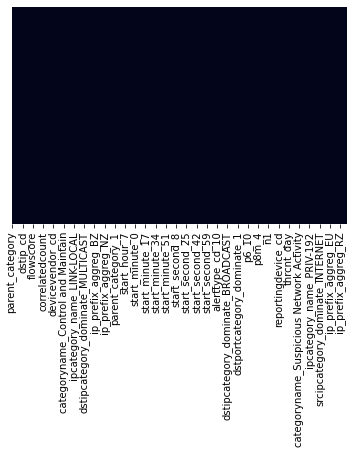

In [70]:
X_train.isnull().values.any()
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False)
X_train.info()



nan_values = X_train.isna()
nan_columns = nan_values.any()

columns_with_nan = X_train.columns[nan_columns].tolist()
print(columns_with_nan)

In [71]:
X_train


,parent_category,overallseverity,timestamp_dist,start_hour,start_minute,start_second,correlatedcount,n1,n2,n3,...,ip_prefix_aggreg_SO,ip_prefix_aggreg_TT,ip_prefix_aggreg_WA,ip_prefix_aggreg_WZ,ip_prefix_aggreg_XI,ip_prefix_aggreg_YA,ip_prefix_aggreg_YC,ip_prefix_aggreg_YT,ip_prefix_aggreg_ZU,ip_prefix_aggreg_other
0,7,3,65684,8,14,34,69,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1,5,1188030,1,0,2,5302,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7,4,43716,14,44,5,346,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7,4,0,20,33,40,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7,4,2401,14,36,11,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39422,7,5,3146,4,16,37,5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
39423,1,3,69048,0,21,11,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
39424,7,4,32872,20,25,58,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
39425,7,4,0,5,59,45,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


[4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 24, 25, 26, 27, 29, 30, 35, 38, 43, 45, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 67, 68, 69, 70, 71, 72, 73, 81, 83, 84, 87, 88, 90, 91, 92, 93, 94, 96, 97, 98, 100, 102, 103, 104, 106, 107, 108, 109, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 171, 172, 173, 175, 176, 177, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 

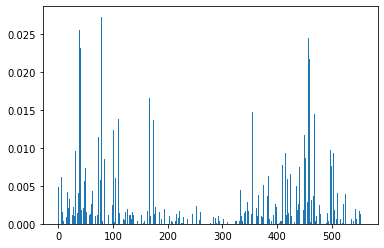

In [72]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

#normalise
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)



list_of_0_score = []

# what are scores for the features
j = 0 
for i in range(len(fs.scores_)):
    #print('Feature %d: %f' % (i, fs.scores_[i]))
    if(fs.scores_[i] < 0.002):
        list_of_0_score.append(i)
        #X_train = X_train.drop(X_train.columns[i], axis=1)
        j = j - 1
    j = j + 1

    
X_train = X_train.drop(list_of_0_score , axis = 1)
print(list_of_0_score)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [73]:
X_train


,0,1,2,3,6,16,17,18,19,20,...,502,503,510,517,521,525,533,537,553,555
0,1.0,0.50,0.023046,0.347826,0.000074,0.003388,0.000049,0.001039,0.000149,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.00,0.416834,0.043478,0.005782,0.000092,0.002234,0.073597,0.001419,0.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.75,0.015338,0.608696,0.000376,0.026923,0.000049,0.005334,0.000149,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.75,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.75,0.000842,0.608696,0.000000,0.000092,0.000049,0.000016,0.000075,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39422,1.0,1.00,0.001104,0.173913,0.000004,0.000458,0.000049,0.000078,0.000075,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39423,0.0,0.50,0.024226,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39424,1.0,0.75,0.011534,0.869565,0.000001,0.000092,0.000049,0.000031,0.000075,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39425,1.0,0.75,0.000000,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
test_size = 0.3
seed = 1011
X_Train, X_Test, y_Train, y_Test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed )


In [75]:
#neural networks
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 50, 2), random_state=1, activation='logistic', max_iter=10000)
clf.fit(X_Train, y_Train)
predictions_neural = clf.predict_proba(X_Test)
predictions_neural_train = clf.predict_proba(X_Train)


print(metrics.roc_auc_score(y_Test, predictions_neural[:,1]))
print(metrics.roc_auc_score(y_Train, predictions_neural_train[:,1]))

0.74742067409683
0.746819449254711


In [76]:
#KNN
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_Train,y_Train)
predictions_KNN = knn.predict_proba(X_Test)
predictions_KNN_train = knn.predict_proba(X_Train)

print(metrics.roc_auc_score(y_Test, predictions_KNN[:,1]))
print(metrics.roc_auc_score(y_Train, predictions_KNN_train[:,1]))

0.8495578169569187
0.8623226593729272


In [77]:
#RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000, max_depth=30, random_state=0)


rfc = rfc.fit(X_Train,y_Train)

predictions_rfc = rfc.predict_proba(X_Test)
predictions_rfc_train = rfc.predict_proba(X_Train)



print(metrics.roc_auc_score(y_Test, predictions_rfc[:,1]))
print(metrics.roc_auc_score(y_Train, predictions_rfc_train[:,1]))


0.9175877470871262
0.9999999026384991


In [78]:
'''
#hypertuning RandomForestClassifier
n_estimators = [1000,2000,3000,4000]#list(range(1000,4000,1000))
max_depth = [30,40,50,60]#list(range(30,60,20))

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

rfc = RandomForestClassifier(random_state=0)
gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 6, 
                      n_jobs = -1, scoring='roc_auc', refit=True)
bestF = gridF.fit(X_Train,y_Train)
predictions = bestF.predict_proba(X_Test)

print("Best score: ",bestF.best_score_)
print("Best params: ", bestF.best_params_)


output:
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best score:  0.912214266857212
Best params:  {'max_depth': 30, 'n_estimators': 2000}
'''

'\n#hypertuning RandomForestClassifier\nn_estimators = [1000,2000,3000,4000]#list(range(1000,4000,1000))\nmax_depth = [30,40,50,60]#list(range(30,60,20))\n\nhyperF = dict(n_estimators = n_estimators, max_depth = max_depth)\n\nrfc = RandomForestClassifier(random_state=0)\ngridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 6, \n                      n_jobs = -1, scoring=\'roc_auc\', refit=True)\nbestF = gridF.fit(X_Train,y_Train)\npredictions = bestF.predict_proba(X_Test)\n\nprint("Best score: ",bestF.best_score_)\nprint("Best params: ", bestF.best_params_)\n\n\noutput:\nFitting 3 folds for each of 16 candidates, totalling 48 fits\nBest score:  0.912214266857212\nBest params:  {\'max_depth\': 30, \'n_estimators\': 2000}\n'